<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/atividade-04-PPGCC-2025_1/blob/main/Atividade_04_PPGCC_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

p-value: 0.000000


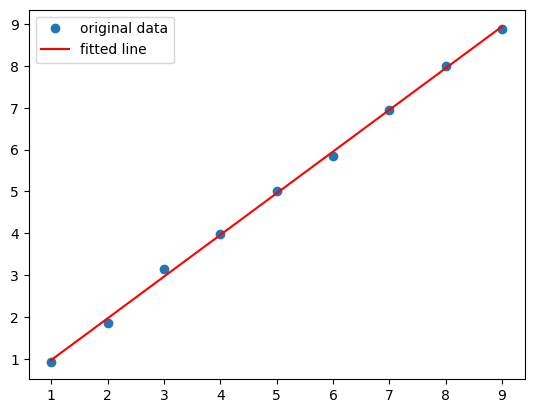

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng()
x = np.linspace(1, 9, 9)
y = x + np.random.normal(loc=0, scale=0.1, size=9)
res = stats.linregress(x, y)
res = stats.linregress(x,y)

print(f"p-value: {res.pvalue:.6f}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

p-value: 0.765107


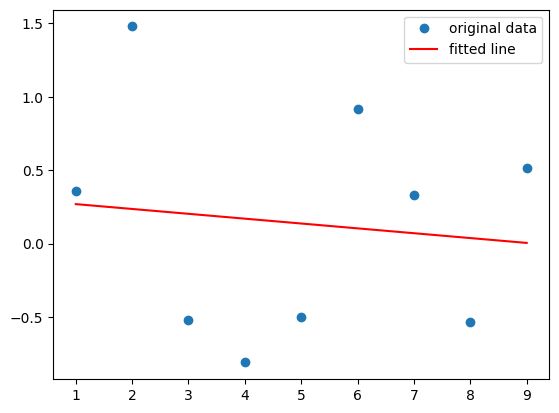

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng()
x = np.linspace(1, 9, 9)
y = np.random.normal(loc=0, scale=1, size=9)
res = stats.linregress(x, y)
res = stats.linregress(x,y)

print(f"p-value: {res.pvalue:.6f}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

# Questão B

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats._result_classes.PearsonRResult.confidence_interval.html

,ID,Peso,Nota,Idade,Sexo
0,1,75.0,53,19,M
1,2,68.6,68,27,M
2,3,76.5,69,18,F
3,4,85.2,62,25,F
4,5,67.7,72,18,M


Average weight: 68.96 kg
Sampling standard deviation of weight: 9.08 kg
Confidence Interval 90%: [67.47, 70.46]


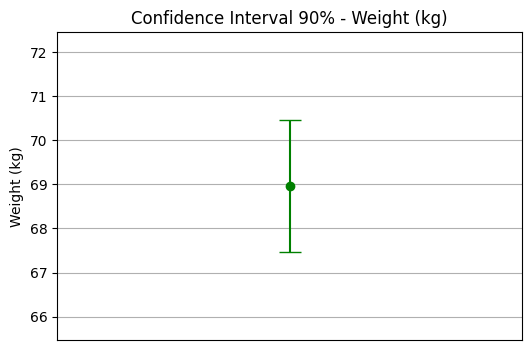

Confidence Interval 95%: [67.18, 70.74]


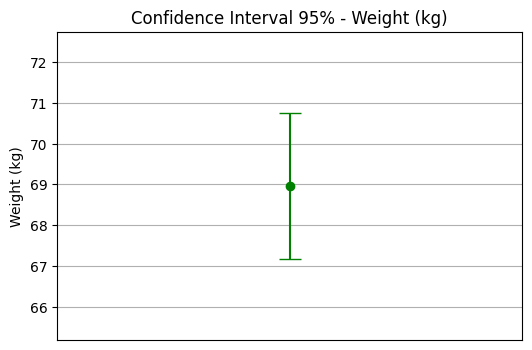

Confidence Interval 99%: [66.62, 71.30]


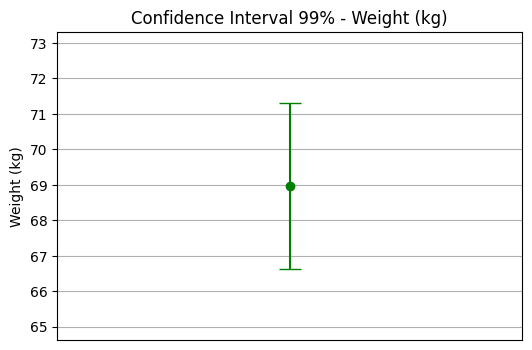

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

url = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/data_individuos.csv'
data = pd.read_csv(url)

display(data.head())
dados = data['Peso']
media = np.mean(dados)
desvio_padrao = np.std(dados, ddof=1)

print(f"Average weight: {media:.2f} kg")
print(f"Sampling standard deviation of weight: {desvio_padrao:.2f} kg")

n = len(dados)
def confidence_interval(confidence_level):
    z_crit = norm.ppf(1 - (1 - confidence_level) / 2)
    erro_z = z_crit * (desvio_padrao / np.sqrt(n))

    ic_inferior_z = media - erro_z
    ic_superior_z = media + erro_z

    print(f"Confidence Interval {int(confidence_level * 100)}%: [{ic_inferior_z:.2f}, {ic_superior_z:.2f}]")

    plt.figure(figsize=(6, 4))
    plt.errorbar(x=0, y=media, yerr=erro_z, fmt='o', color='green', capsize=8)
    plt.title(f'Confidence Interval {int(confidence_level * 100)}% - Weight (kg)')
    plt.xticks([])
    plt.ylabel('Weight (kg)')
    plt.grid(True)
    plt.ylim(ic_inferior_z - 2, ic_superior_z + 2)
    plt.show()

confidence_interval(0.90)
confidence_interval(0.95)
confidence_interval(0.99)